# Phishing Url's Detection

In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data
data0 = pd.read_csv('5.urldata.csv')
data0.head()
     

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


# EDA

In [3]:
data0.shape

(10000, 18)

In [4]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

In [5]:
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [6]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy() # No need much for model training and predictions

In [7]:
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

# Visualization

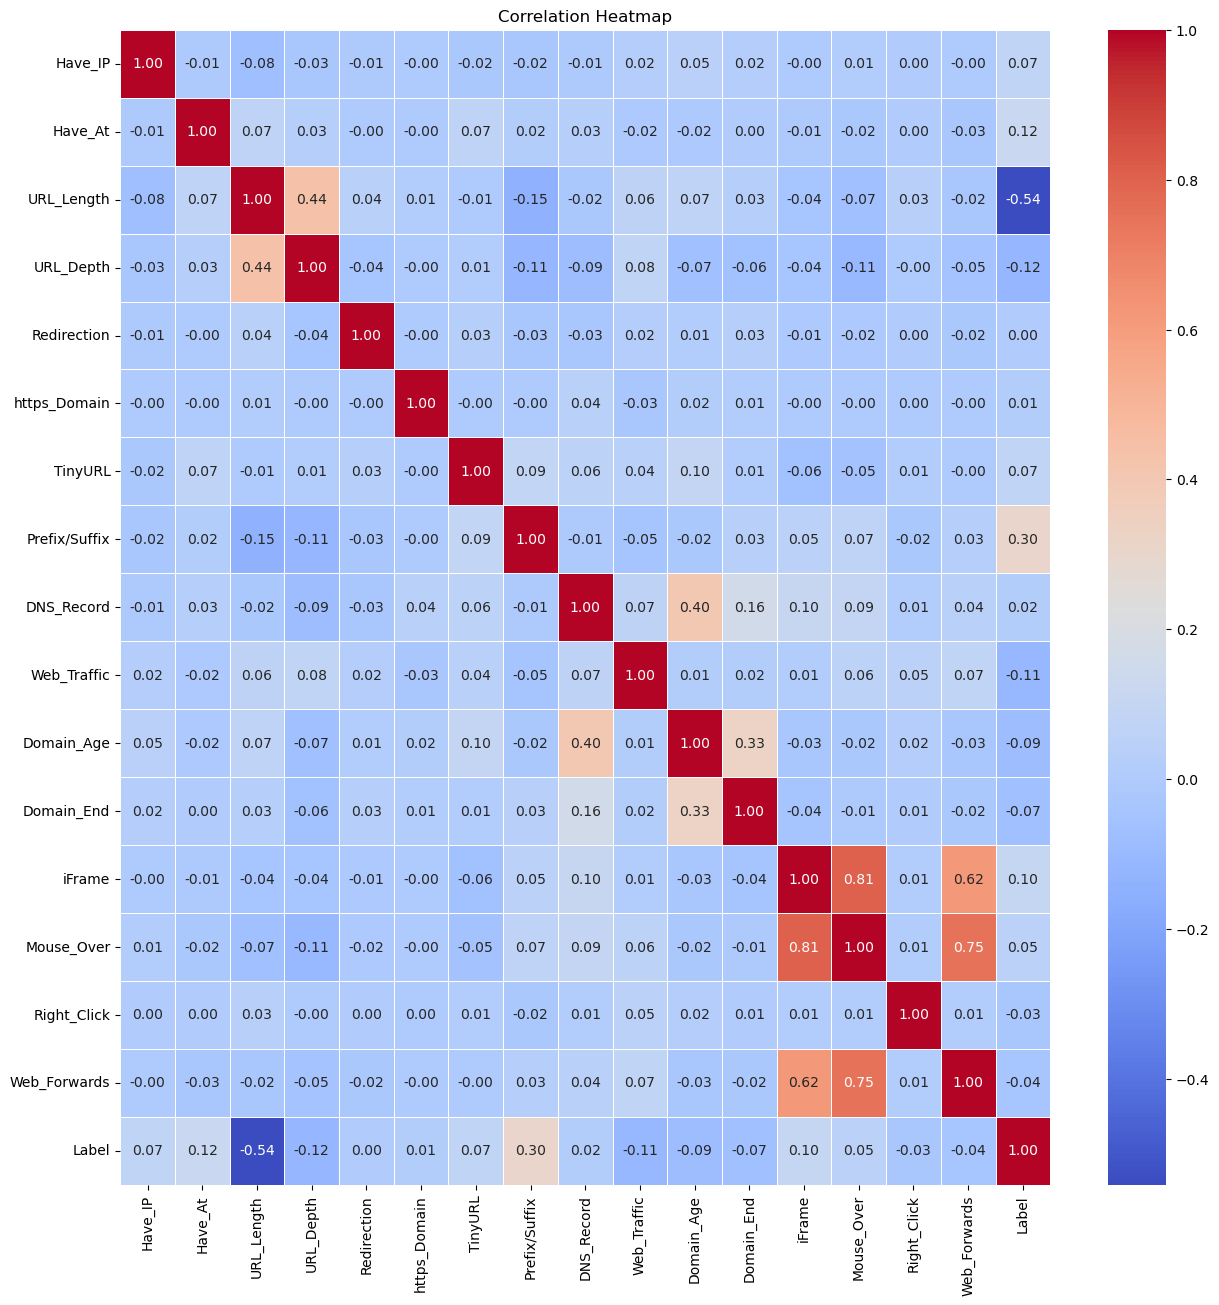

In [8]:
plt.figure(figsize=(15, 15))  # Set figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title to the plot
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

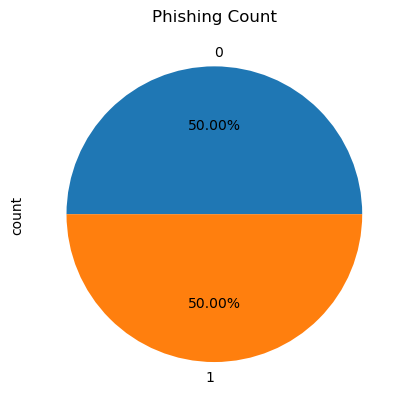

In [9]:
# Phishing Count in pie chart

data['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

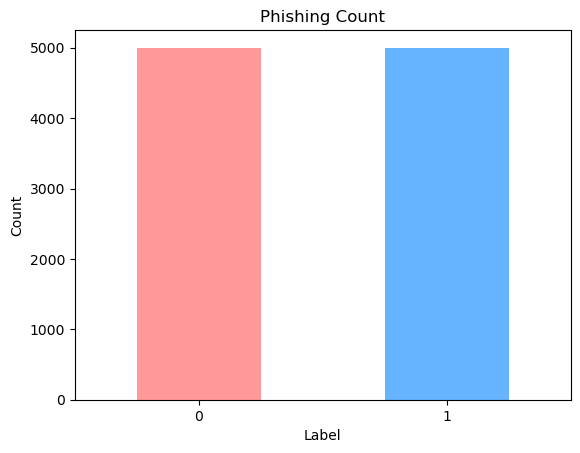

In [10]:
data['Label'].value_counts().plot(kind='bar', color=['#ff9999', '#66b3ff'])

# Add labels and title
plt.title("Phishing Count")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep class labels horizontal

# Show the plot
plt.show()

In [11]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,2,0,0,1,0,0,1,1,1,0,0,1,0,1
1,0,0,1,2,0,0,0,0,0,0,1,1,0,0,1,0,0
2,0,0,1,3,0,0,1,0,0,1,0,0,0,0,1,0,0
3,0,0,1,3,0,0,0,1,0,1,0,1,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0


# Model training

In [12]:
# Sepratating & assigning features and target columns to X & y
y = data['Label'] # target
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [13]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

In [14]:
#importing packages
from sklearn.metrics import accuracy_score

In [15]:
# # Creating holders to store the model performance results
# ML_Model = []
# acc_train = []
# acc_test = []

# #function to call for storing the results
# def storeResults(model, a,b):
#   ML_Model.append(model)
#   acc_train.append(round(a, 3))
#   acc_test.append(round(b, 3))
     

In [16]:
# Creating holders to store the model performance results
ML_Model = []
#acc_train = []
acc_test = []

#function to call for storing the results
def storeRes(model, a):
    ML_Model.append(model)
    #acc_train.append(round(a, 3))
    acc_test.append(round(a, 3))

# Decission Tree 

In [17]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [18]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)
     

In [19]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.814
Decision Tree: Accuracy on test Data: 0.809


In [20]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
#storeResults('Decision Tree', acc_train_tree, acc_test_tree)
storeRes('Decision Tree',acc_test_tree)

# Random Forest

In [21]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [22]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [23]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.821
Random forest: Accuracy on test Data: 0.818


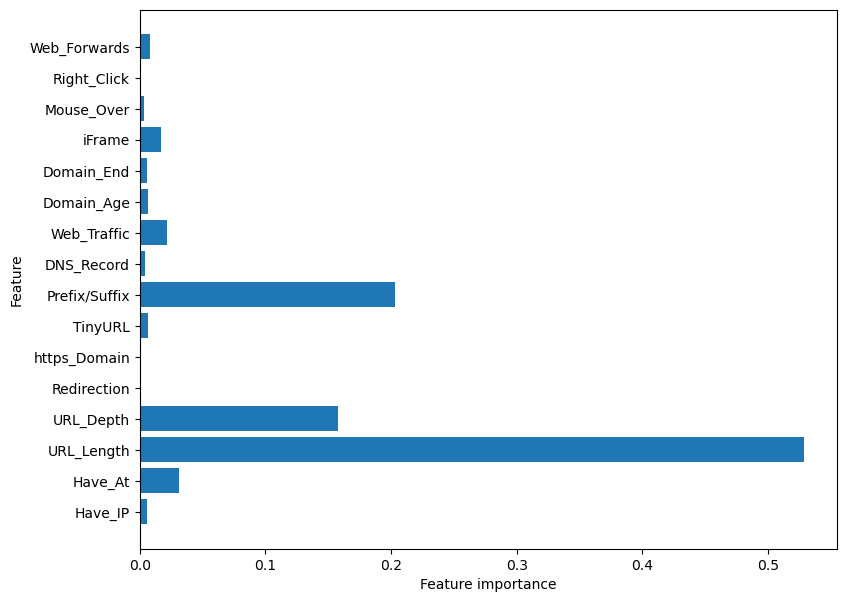

In [24]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [25]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
#storeResults('Random Forest', acc_train_forest, acc_test_forest)
storeRes('Random Forest',acc_test_forest)

# Support Vector Machine

In [26]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [27]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [28]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.803
SVM : Accuracy on test Data: 0.796


In [29]:
#storeResults('SVM', acc_train_svm, acc_test_svm)
storeRes('SVM',acc_test_svm)

# XGBoost Classifier

In [30]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
# Predict the target variable for the test set
y_pred = xgb.predict(X_test)


In [32]:
from sklearn.metrics import accuracy_score,classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))
storeRes('xgboost',accuracy)

Accuracy: 0.8600
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       980
           1       0.93      0.78      0.85      1020

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



In [33]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[920  60]
 [220 800]]


In [34]:
import joblib

# Save the trained model to a file
joblib.dump(xgb, 'xgboost_model.joblib')


['xgboost_model.joblib']

In [35]:
import joblib

# Load the trained XGBoost model from file
xgb = joblib.load('xgboost_model.joblib')


In [36]:
import xgboost as xgb
import joblib

# Assuming X and y are your feature matrix and target labels
model = xgb.XGBClassifier()
model.fit(X, y)  # Fit the model with your data

# Save the trained model
joblib.dump(model, 'xgb_model.pkl')


['xgb_model.pkl']

# Prediction

In [39]:
import joblib
import numpy as np
import re
from urllib.parse import urlparse

# Feature extraction function
def extract_features(url):
    parsed_url = urlparse(url)
    hostname = parsed_url.hostname if parsed_url.hostname else ""
    path = parsed_url.path if parsed_url.path else ""

    features = {}
    features['Have_IP'] = 1 if re.match(r'^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$', hostname) else 0
    features['Have_At'] = 1 if '@' in url else 0
    features['URL_Length'] = len(url)
    features['URL_Depth'] = path.count('/')
    features['Redirection'] = 1 if '//' in url[7:] else 0
    features['https_Domain'] = 1 if 'https' in parsed_url.scheme else 0
    features['TinyURL'] = 1 if 'tinyurl' in url else 0
    features['Prefix/Suffix'] = 1 if '-' in hostname else 0
    features['DNS_Record'] = 1 if hostname != '' else 0
    features['Web_Traffic'] = 1 if len(url) > 20 else 0  # This logic might need revision
    features['Domain_Age'] = 1 if len(hostname.split('.')) > 2 else 0
    features['Domain_End'] = 1 if hostname.endswith(('.com', '.org', '.net')) else 0
    features['iFrame'] = 1 if '<iframe' in url else 0
    features['Mouse_Over'] = 1 if 'mouseover' in url else 0
    features['Right_Click'] = 1 if 'rightclick' in url else 0
    features['Web_Forwards'] = 1 if 'forward' in url else 0
    
    return list(features.values())

# Load the XGBoost model
def load_model(model_path='xgb_model.pkl'):
    try:
        model = joblib.load(model_path)
        return model
    except FileNotFoundError:
        print("Model file not found!")
        return None

# Predict URL safety
def predict_url_safety(url, model_path='xgb_model.pkl'):
    model = load_model(model_path)
    if model is None:
        return "Model not found. Train the model first."
    
    features = extract_features(url)
    features_array = np.array(features).reshape(1, -1)  # Reshape to match model input
    prediction = model.predict(features_array)
    
    return "safe" if prediction[0] == 0 else "not safe"

# Example usage
if __name__ == "__main__":
    #test_url = 'http://1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/'  # Example URL
    test_url='https://www.youtube.com/watch?v=dE4tG1mFZ-Q'
    result = predict_url_safety(test_url)
    print(f"The URL '{test_url}' is predicted to be {result}.")
#     print(result)


The URL 'https://www.youtube.com/watch?v=dE4tG1mFZ-Q' is predicted to be safe.


In [38]:
results = pd.DataFrame({ 'ML Model': ML_Model,'Test Accuracy': acc_test})
results.sort_values(by=['Test Accuracy'], ascending=False)

,ML Model,Test Accuracy
3,xgboost,0.860
1,Random Forest,0.818
0,Decision Tree,0.809
2,SVM,0.796
